## 1. Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from io import StringIO
from sklearn.tree import export_graphviz 
import pydotplus
import matplotlib.image as mpimg 

## 2. Importing Data

In [2]:
df= pd.read_csv('Fraud_check (1).csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## 3. Data Understanding

In [3]:
print('No. of observations:{}\nNo. of features:{}'.format(df.shape[0],df.shape[1]))

No. of observations:600
No. of features:6


In [4]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [6]:
df.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


<AxesSubplot:xlabel='Taxable.Income'>

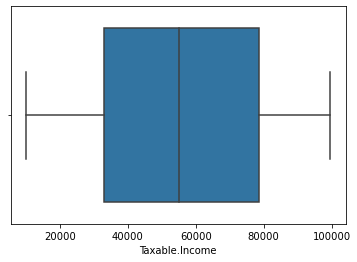

In [7]:
sns.boxplot(df['Taxable.Income'])

#### >>>There are no outliers in the data

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


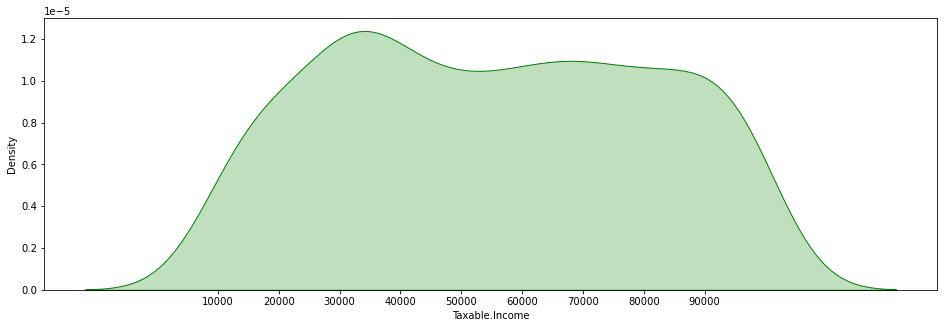

In [9]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

#### >>>The data is Skewed on the right
#### >>>The data has negative Kurtosis

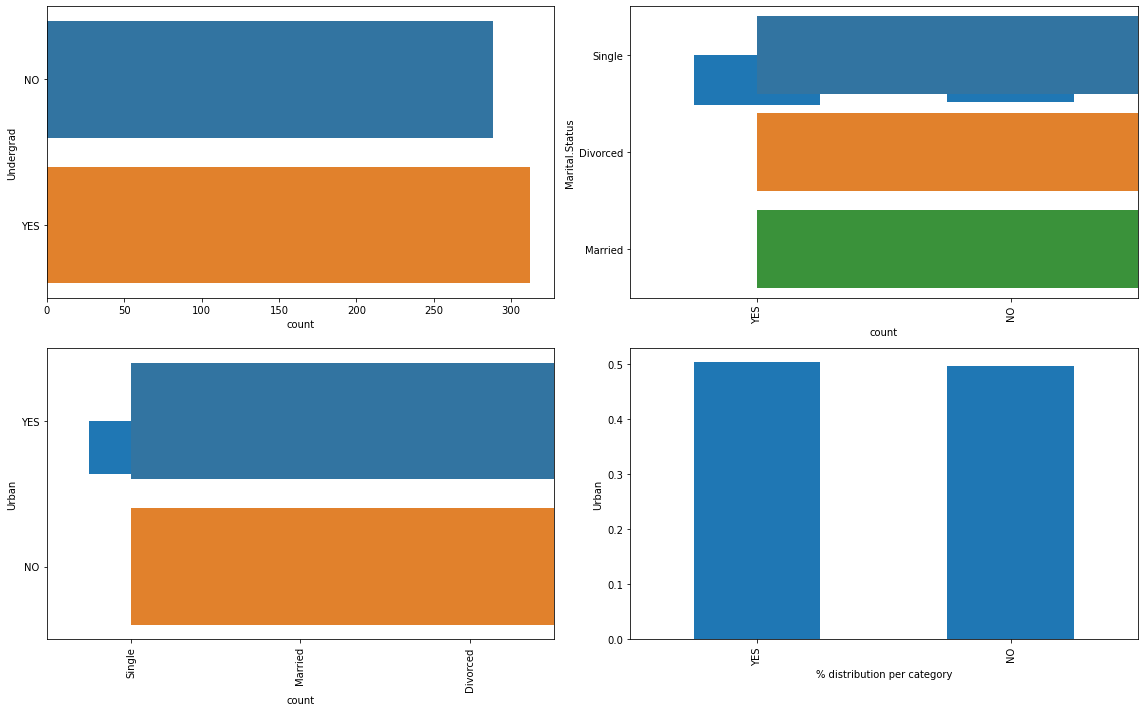

In [12]:
obj_colum= df.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,y=col)
    plt.subplot(2,2,i+1)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

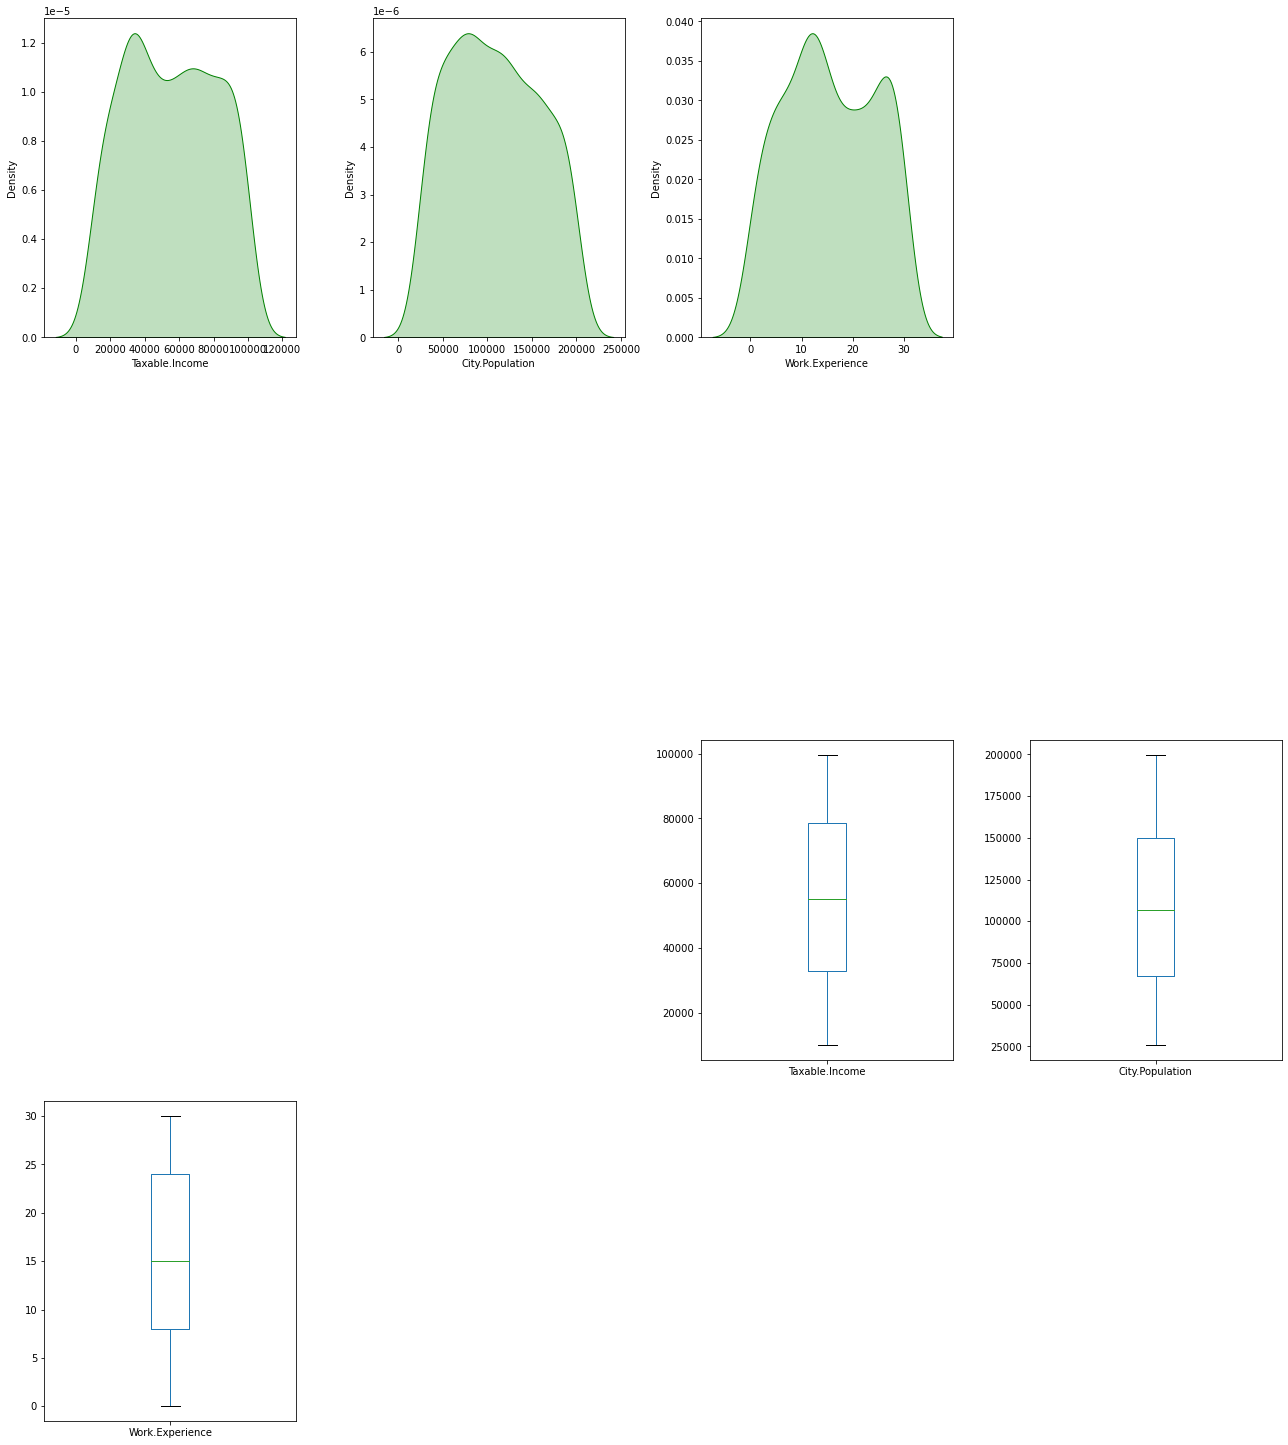

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [13]:
num_columns= df.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [14]:
df1= df.copy()
df1.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [15]:
df1= pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])

<AxesSubplot:>

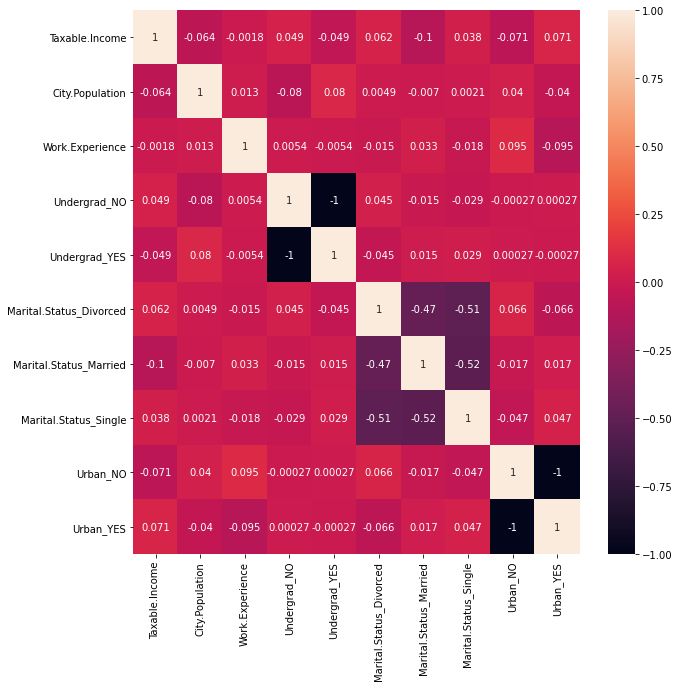

In [17]:
corr= df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

### Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [18]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [20]:
df1.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,good,50047,10,1,0,0,0,1,0,1
1,good,134075,18,0,1,1,0,0,0,1
2,good,160205,30,1,0,0,1,0,0,1
3,good,193264,15,0,1,0,0,1,0,1
4,good,27533,28,1,0,0,1,0,1,0


## 4. Model Building|| Model Testing

In [21]:
x= df1.iloc[:,1:10]
y= df1.iloc[:,0]

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)

In [23]:
y_train.value_counts()

good     379
risky    101
Name: Taxable.Income, dtype: int64

In [25]:
model= RandomForestClassifier(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.7104166666666667

In [26]:
pred_train= model.predict(x_train)

In [27]:
accuracy_score(y_train,pred_train)

1.0

In [28]:
confusion_matrix(y_train,pred_train)

array([[379,   0],
       [  0, 101]], dtype=int64)

In [29]:
pred_test= model.predict(x_test)

In [30]:
accuracy_score(y_test,pred_test)

0.7833333333333333

In [31]:
confusion_matrix(y_test,pred_test)

array([[91,  6],
       [20,  3]], dtype=int64)

In [32]:
cols= list(df1.columns)
predictors= cols[1:10]
target= cols[0]

In [33]:
tree1= model.estimators_[20]

In [34]:
dot_data= StringIO()

In [35]:
export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)

In [36]:
graph= pydotplus.graph_from_dot_data(dot_data.getvalue())

In [37]:
graph.write_png('fraud_full.png')

True

## 5. Conclusion
Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 72%
As seen in the confusion matrix of Test data 94 instances are predicted correctly and 26 instances are not.

In [38]:
rf_small= RandomForestClassifier(n_estimators=10, max_depth = 3)
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [39]:
tree_small= rf_small.estimators_[5]

In [40]:
export_graphviz(tree_small, out_file = dot_data, feature_names= predictors, rounded = True, precision = 1)
graph_small= pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('fraud_small.png')

True

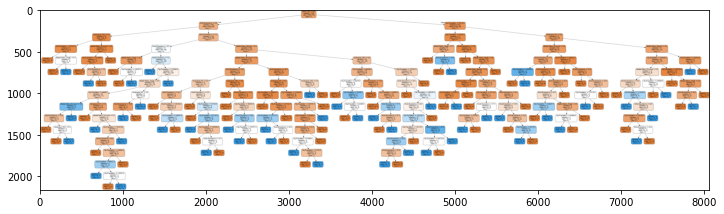

In [42]:
plt.figure(figsize=(12,12))
img= mpimg.imread('fraud_small.png') 
plt.imshow(img)

In [43]:
model.feature_importances_

array([0.51016212, 0.35781012, 0.01864175, 0.01861754, 0.01775233,
       0.02033438, 0.02017018, 0.01818161, 0.01832996])

In [44]:
fi= pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
0,City.Population,0.510162
1,Work.Experience,0.357810
5,Marital.Status_Married,0.020334
6,Marital.Status_Single,0.020170
2,Undergrad_NO,0.018642
3,Undergrad_YES,0.018618
8,Urban_YES,0.018330
7,Urban_NO,0.018182
4,Marital.Status_Divorced,0.017752


#### >>>As seen in the above table city population is most important feature
 